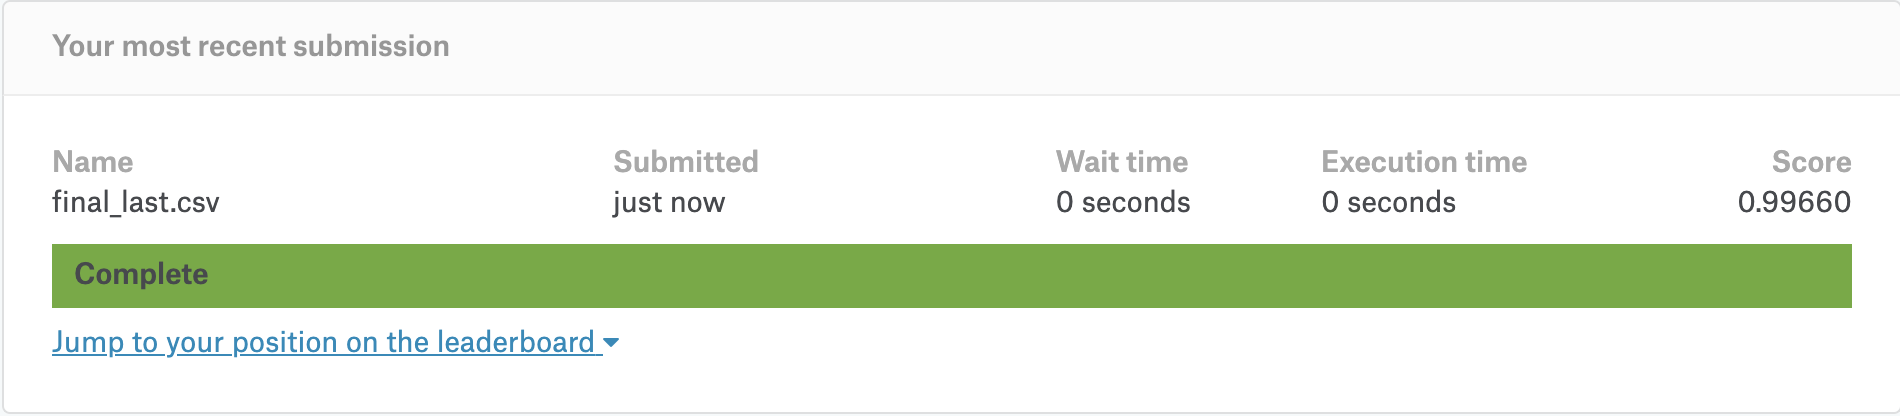

In [1]:
from IPython.display import Image
Image(filename='Day_101_HW.png')